In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import all required libraries and modules

In [25]:
import os 
import sys
import numpy as np 
import pandas as pd 
import seaborn as sns
from typing import Union
import plotly.express as px
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
os.chdir("/Users/nikolaynechay/Iris-Species")

sns.set(style='white', color_codes=True)

### Setting required Global Variables

In [27]:
IRIS_PATH="src/core/datafiles/raw/Iris.csv"

# Define problem

# Data Collection

### Load dataset

In [28]:
iris_df = pd.read_csv(IRIS_PATH)
iris_df.drop('Id', axis=1, inplace=True)  # Delete ID column
display(iris_df.head().style.background_gradient())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [29]:
# Check for nulls and data types
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris_df.isnull().values.any()

False

##### Observations :
    
* After displaying info, we can see that there are no missing values in this dataset and all features are numerical and target variable is categorical. 

In [31]:
# There are 150 rows and 5 columns in the Iris Dataset
iris_df.shape

(150, 5)

In [32]:
# Display some basic statistics like: (mean, standard deviation, minimum, maximum, 25th percentile, 50th percentile and 75 percentile of distribution by each feature)
display(iris_df.describe().style.background_gradient())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Observations:

* The Sepal Length ranges from [4.3 - 7.9] with a mean of [5.8433] cm and standard deviation 0.82 cm.
* The Sepal Width ranges from [2.0 - 4.4] with a mean of [3.0540] cm and standard deviation 0.43 cm.
* The Petal Length ranges from [1.0 - 6.9] with a mean of [3.758] cm and standard deviation 1.76 cm.
* The Petal Width ranges from [0.1 - 2.5] with a mean of [1.198667] cm and standard deviation 0.76 cm.



In [33]:
# How many species of Iris are in the dataset?
iris_df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# EDA

##### Correlation Matrix between numerical features

In [34]:
numeric_iris_df = iris_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_iris_df.corr()
correlation_matrix.style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


This matrix shows Pearson correlation coefficients (r), which range from -1 to 1:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear correlation.
These coefficients help us understand the strength and direction of linear associations between variables.

Strong Positive Correlations

The following feature pairs exhibit strong positive correlations:

    PetalLengthCm and PetalWidthCm → r = 0.963
    
    SepalLengthCm and PetalLengthCm → r = 0.872
    
    SepalLengthCm and PetalWidthCm → r = 0.818
These strong correlations suggest that these features are linearly dependent, which could be useful for:

- Dimensionality reduction,
- Feature engineering or Multicollinearity diagnostics before model training.

### Data Visualization


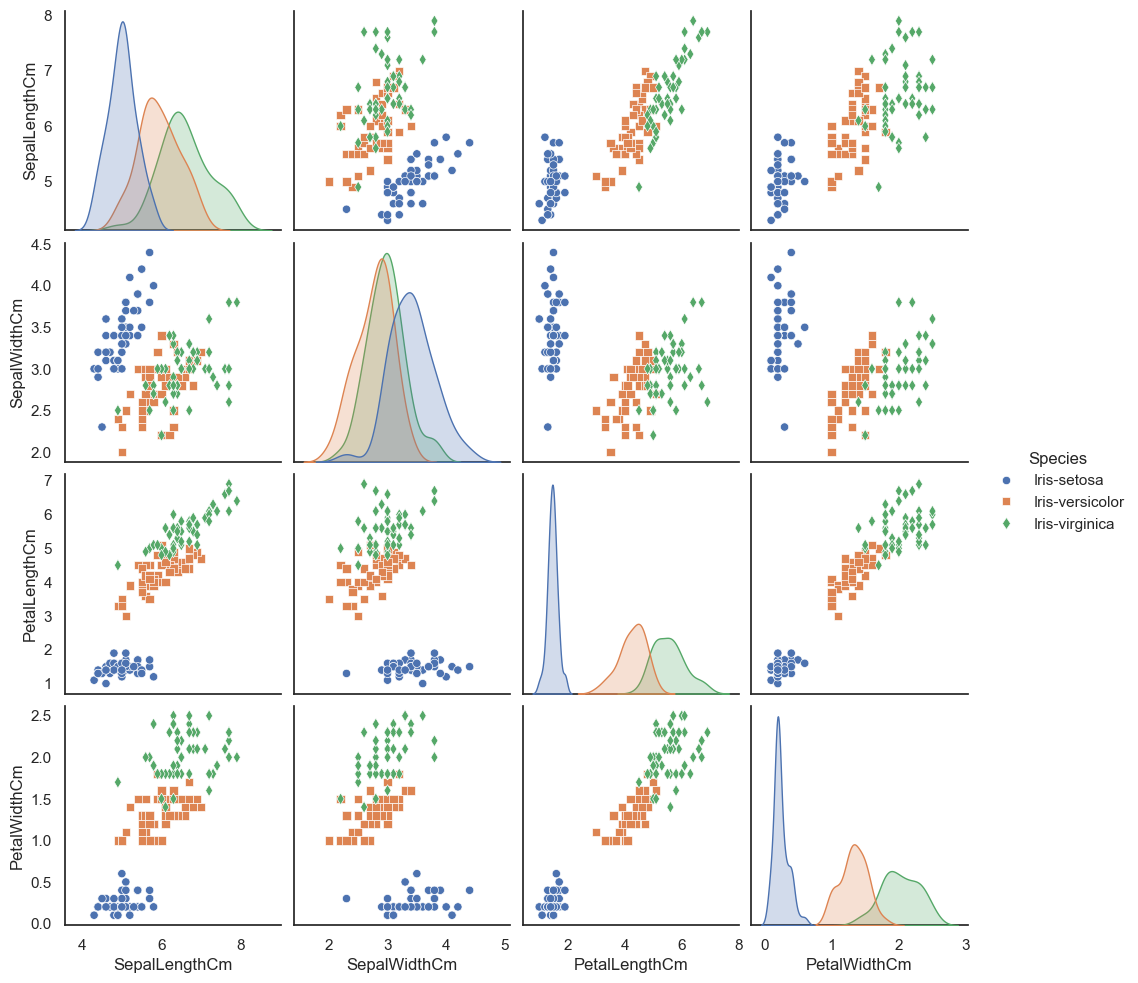

In [38]:
# Visualize pairwise relationships between all numerical features, colored by species
sns.pairplot(data=iris_df, hue='Species', markers=["o", "s", "d"])